In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [ ]:
class AgentState(TypedDict):
    """
    Represents the state of the agent in the graph.
    """
    num1: int
    num2: int
    operation: str
    finalnumber: int

In [3]:
def add_numbers(state:AgentState) -> AgentState:
    """Adds two numbers in the state."""
    state['finalnumber'] = state['num1'] + state['num2']
    return state

def subtract_numbers(state:AgentState) -> AgentState:
    """Subtracts two numbers in the state."""
    state['finalnumber'] = state['num1'] - state['num2']
    return state

def decision(state: AgentState) -> AgentState:
    """Decides which operation to perform based on the state."""
    if state['operation'] == 'add':
        return "addition"
    elif state['operation'] == 'subtract':
        return "subtraction"
    else:
        raise ValueError("Unknown operation")

In [7]:
graph = StateGraph(AgentState)

graph.add_node("add_nodes", add_numbers)
graph.add_node("subtract_nodes", subtract_numbers)
graph.add_node("decision", lambda state:state) #passthrough function

graph.add_edge(START, "decision")
graph.add_conditional_edges(
    "decision", # Source node
    decision, # Function to determine the next node
    {
        "addition": "add_nodes", # Target node for addition
        "subtraction": "subtract_nodes" # Target node for subtraction
    }
)
graph.add_edge("add_nodes", END)
graph.add_edge("subtract_nodes", END)

app = graph.compile()


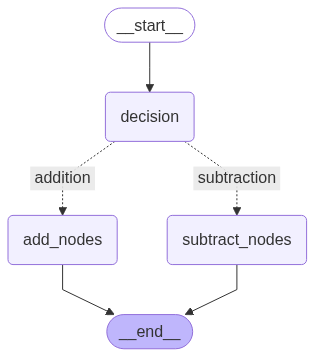

In [8]:
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph as an image

In [12]:
result = app.invoke({"num1": 5, "num2": 3, "operation": "add"})
print(result)

{'num1': 5, 'num2': 3, 'operation': 'add', 'finalnumber': 8}
